In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_hdf('/content/drive/MyDrive/audio_lyrics_combined.h5')
df.head()

song_audio song_lyrics Quadrant   AllMusic Id         Artist  \
0       A003        L053       Q3  MT0008469560  Stevie Wonder   
1       A005        L055       Q1  MT0005204984         Prince   
3       A010        L060       Q2  MT0031974477      Pearl Jam   
4       A013        L063       Q2  MT0002578360      The Clash   
6       A023        L073       Q2  MT0002558335     Papa Roach   

            Title                                             Genres  \
0          Lately                      Soul,Pop-Soul,Smooth Soul,R&B   
1  U Got the Look  Dance-Rock,R&B,Contemporary Pop/Rock,Contempor...   
3          Animal  Pop/Rock,Hard Rock,Alternative/Indie Rock,Alte...   
4  London Calling  Pop/Rock,New Wave,British Punk,Punk/New Wave,P...   
6     Last Resort             Alternative Metal,Pop/Rock,Heavy Metal   

                                              lyrics  \
0  Lately I have had the strangest feeling\nWith ...   
1  Here we are folks\nThe dream we all dream off\...   
3  One two three four five against one \nFive fiv...   
4  London calling to the faraway towns\nNow that ...   
6  Cut my life into pieces\nThis is my last resor...   

                                spectrogram_features  
0  [[-80.0, -80.0, -80.0, -80.0, -77.71686, -71.7...  
1  [[-80.0, -80.0, -69.585594, -48.468002, -38.08...  
3  [[-80.0, -79.827644, -59.335518, -55.471622, -...  
4  [[-80.0, -76.85271, -69.828865, -70.31357, -64...  
6  [[-24.160717, -27.344158, -28.813421, -28.3729...

In [3]:
import numpy as np
import pandas as pd

# Define split_genres function (assuming it's not globally available after kernel restart)
def split_genres(genre_string):
    if isinstance(genre_string, str):
        return [genre.strip() for genre in genre_string.split(',')]
    return []

# Recalculate all_genres_list from the original 'Genres' column
all_genres_list_original = df['Genres'].apply(split_genres).explode()

# Recalculate genre_counts from the original genres
genre_counts = all_genres_list_original.value_counts()

# Now define top_10_genres_list
top_10_genres_list = genre_counts.head(10).index.tolist()

# Recalculate genres_list_of_lists from the original 'Genres' column
genres_list_of_lists = df['Genres'].apply(split_genres).tolist()

def select_top_genre_from_list(genres_for_song_list, top_genres_list):
    """
    Selects the first genre from genres_for_song_list that is present in top_genres_list.
    Returns None if no such genre is found.
    """
    if not isinstance(genres_for_song_list, list):
        return None # Handle cases where genre data might not be a list

    for genre in genres_for_song_list:
        if genre in top_genres_list:
            return genre
    return None

# Apply the function to the genres_list_of_lists
df['Genres'] = [select_top_genre_from_list(genre_list, top_10_genres_list) for genre_list in genres_list_of_lists]

print("DataFrame head with 'Genres' column updated to a single top 10 genre or None:")
display(df.head())
print("\nValue counts of the newly filtered 'Genres' column:")
print(df['Genres'].value_counts(dropna=False))

DataFrame head with 'Genres' column updated to a single top 10 genre or None:


song_audio song_lyrics Quadrant   AllMusic Id         Artist  \
0       A003        L053       Q3  MT0008469560  Stevie Wonder   
1       A005        L055       Q1  MT0005204984         Prince   
3       A010        L060       Q2  MT0031974477      Pearl Jam   
4       A013        L063       Q2  MT0002578360      The Clash   
6       A023        L073       Q2  MT0002558335     Papa Roach   

            Title    Genres  \
0          Lately       R&B   
1  U Got the Look       R&B   
3          Animal  Pop/Rock   
4  London Calling  Pop/Rock   
6     Last Resort  Pop/Rock   

                                              lyrics  \
0  Lately I have had the strangest feeling\nWith ...   
1  Here we are folks\nThe dream we all dream off\...   
3  One two three four five against one \nFive fiv...   
4  London calling to the faraway towns\nNow that ...   
6  Cut my life into pieces\nThis is my last resor...   

                                spectrogram_features  
0  [[-80.0, -80.0, -80.0, -80.0, -77.71686, -71.7...  
1  [[-80.0, -80.0, -69.585594, -48.468002, -38.08...  
3  [[-80.0, -79.827644, -59.335518, -55.471622, -...  
4  [[-80.0, -76.85271, -69.828865, -70.31357, -64...  
6  [[-24.160717, -27.344158, -28.813421, -28.3729...


Value counts of the newly filtered 'Genres' column:
Genres
Pop/Rock         757
Electronic       294
Country          255
Rap              165
Jazz             139
Blues            130
R&B              117
None              95
International     64
Folk              62
Vocal             47
Name: count, dtype: int64


In [4]:
# Remove rows where 'Genres' column is None
df.dropna(subset=['Genres'], inplace=True)

print("\nValue counts of 'Genres' column after removing None:")
print(df['Genres'].value_counts(dropna=False))


Value counts of 'Genres' column after removing None:
Genres
Pop/Rock         757
Electronic       294
Country          255
Rap              165
Jazz             139
Blues            130
R&B              117
International     64
Folk              62
Vocal             47
Name: count, dtype: int64


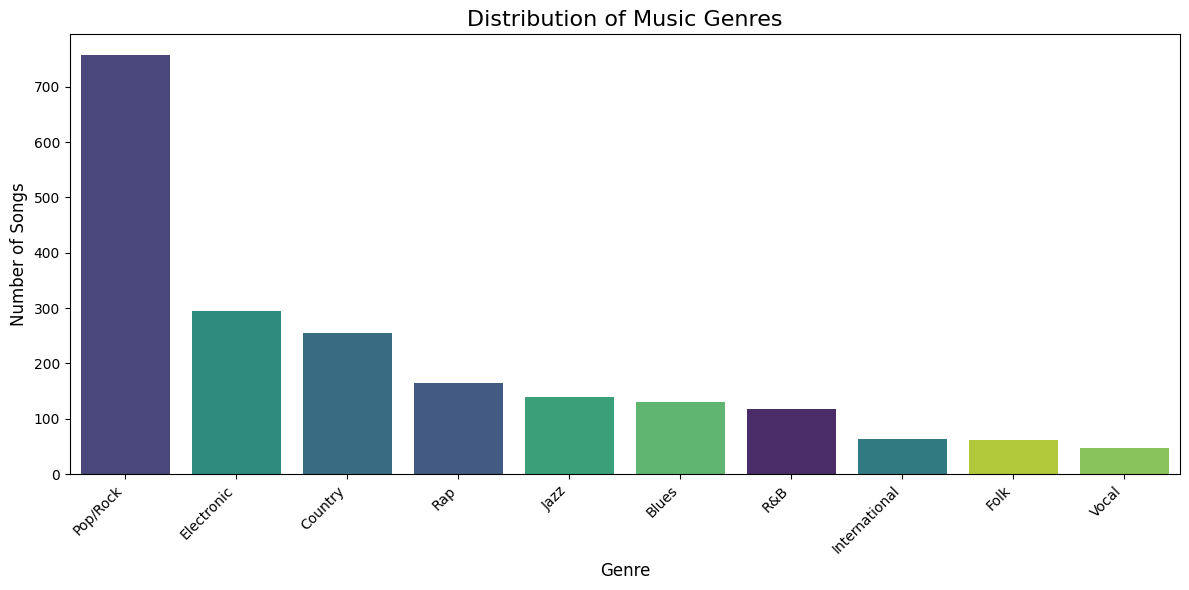

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate value counts for 'Genres' column
genre_counts = df['Genres'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.countplot(data=df, x='Genres', order=genre_counts.index, hue='Genres', legend=False, palette='viridis')

# Add title and labels
plt.title('Distribution of Music Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right') # 'ha' (horizontal alignment) helps position rotated labels

# Display the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Lyrics Length Distribution Histogram


In [9]:
df['lyrics_word_count'] = df['lyrics'].astype(str).apply(lambda x: len(x.split()) if x.strip() else 0)

print("DataFrame head with new 'lyrics_word_count' column:")
display(df[['lyrics', 'lyrics_word_count']].head())

DataFrame head with new 'lyrics_word_count' column:


lyrics  lyrics_word_count
0  Lately I have had the strangest feeling\nWith ...                214
1  Here we are folks\nThe dream we all dream off\...                340
3  One two three four five against one \nFive fiv...                137
4  London calling to the faraway towns\nNow that ...                234
6  Cut my life into pieces\nThis is my last resor...                333

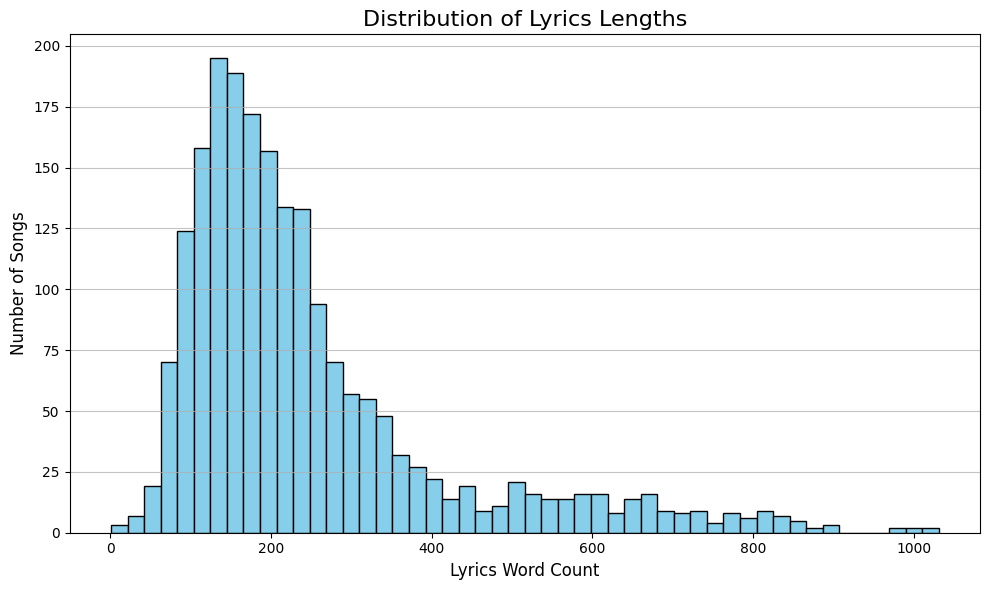

In [10]:
import matplotlib.pyplot as plt

# Plotting the histogram of 'lyrics_word_count'
plt.figure(figsize=(10, 6))
plt.hist(df['lyrics_word_count'], bins=50, color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Lyrics Lengths', fontsize=16)
plt.xlabel('Lyrics Word Count', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)

# Display the plot
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Spectrogram Visualization per Genre Sample
Select one random song from each genre and plot its Mel-Spectrogram.


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get a list of all unique genres
unique_genres = df['Genres'].unique()

print(f"Found {len(unique_genres)} unique genres: {unique_genres.tolist()}")

Found 10 unique genres: ['R&B', 'Pop/Rock', 'Rap', 'Country', 'International', 'Electronic', 'Jazz', 'Blues', 'Vocal', 'Folk']


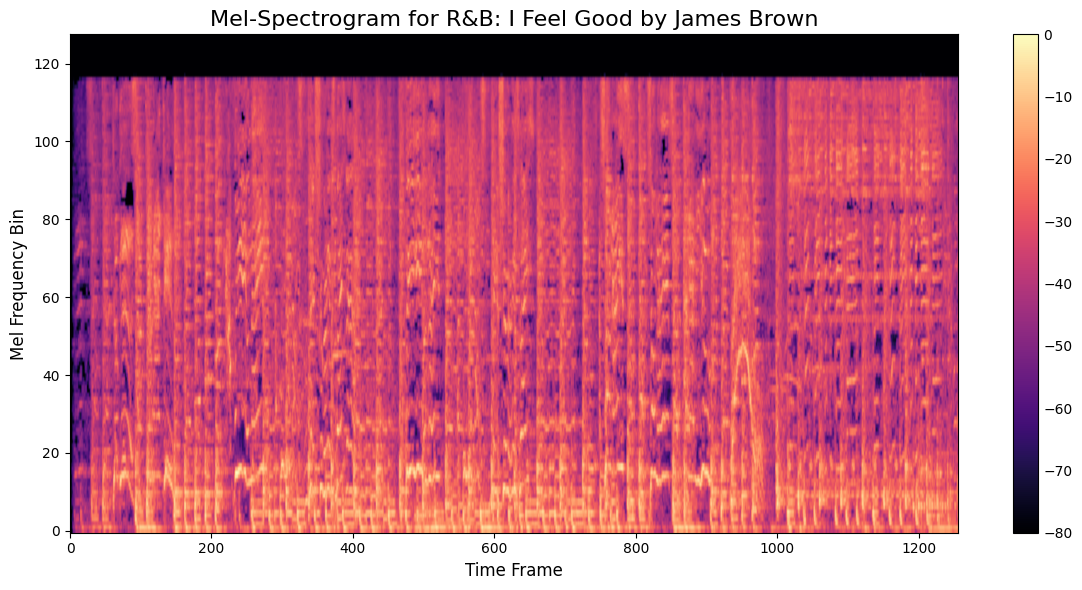

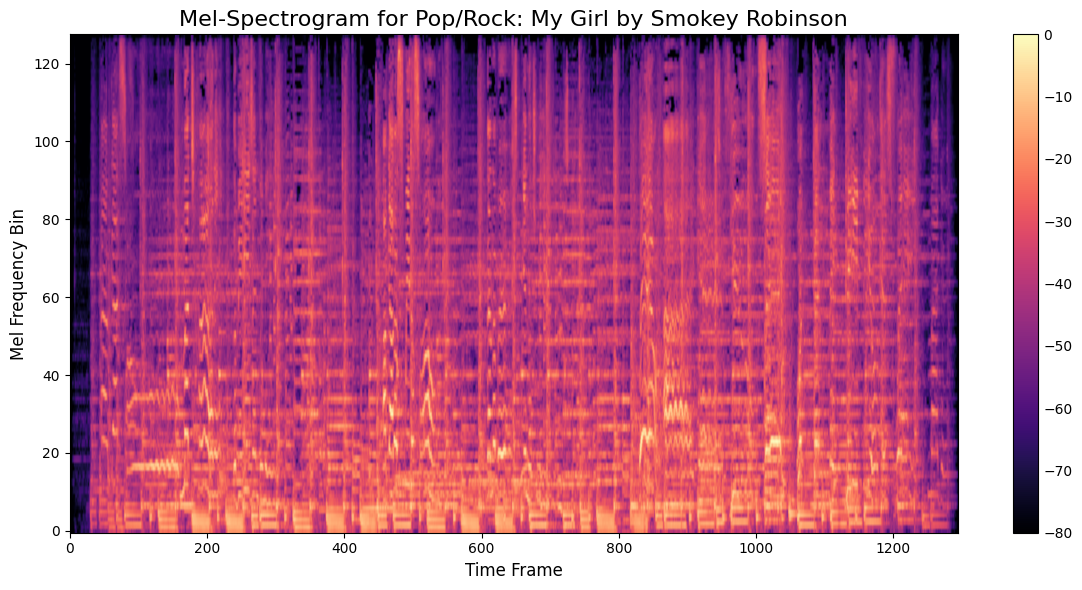

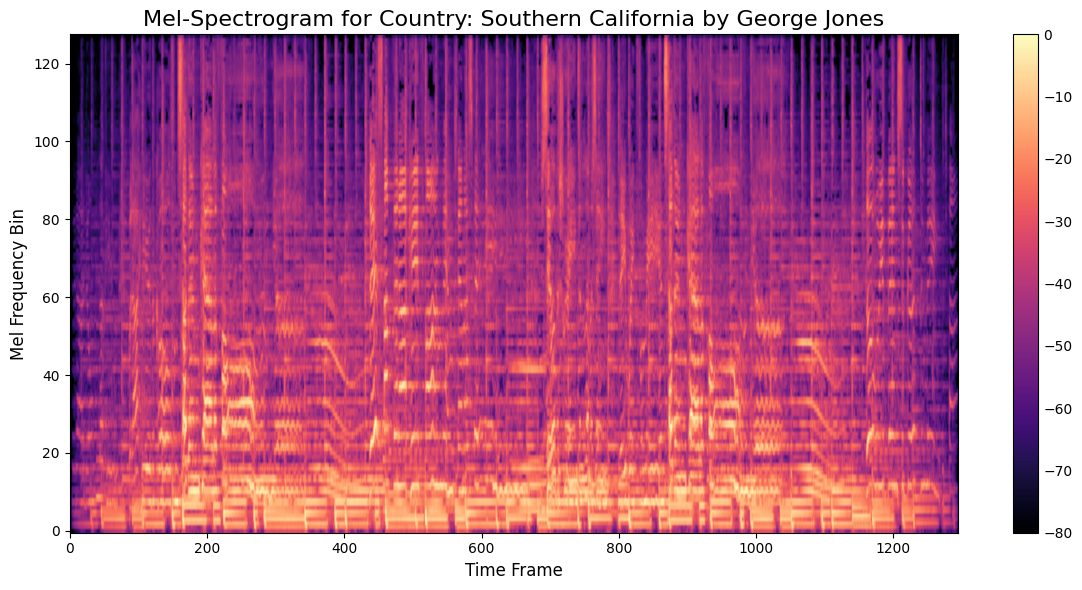

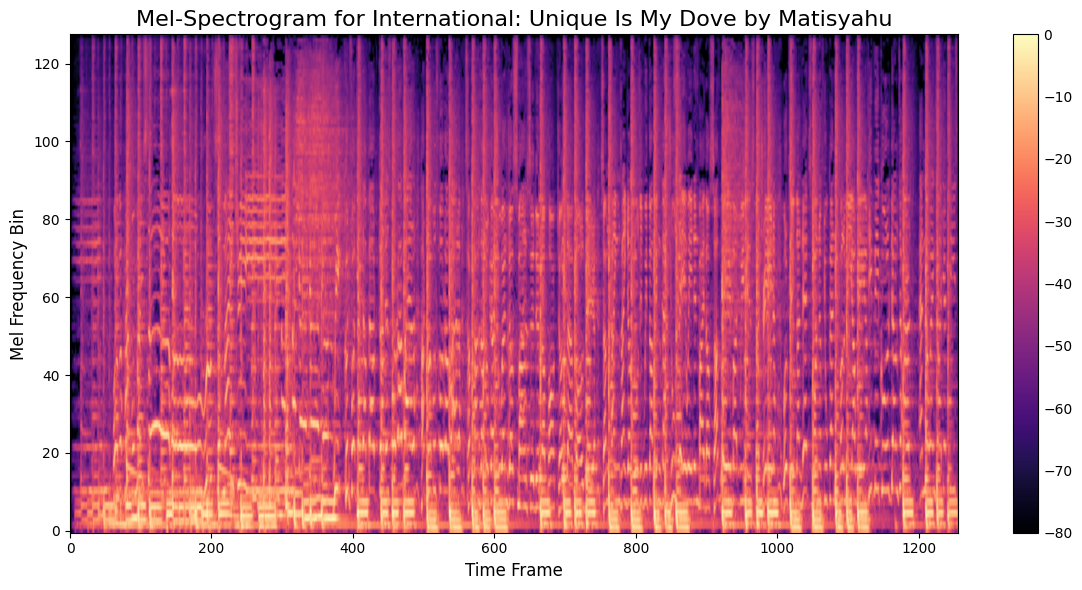

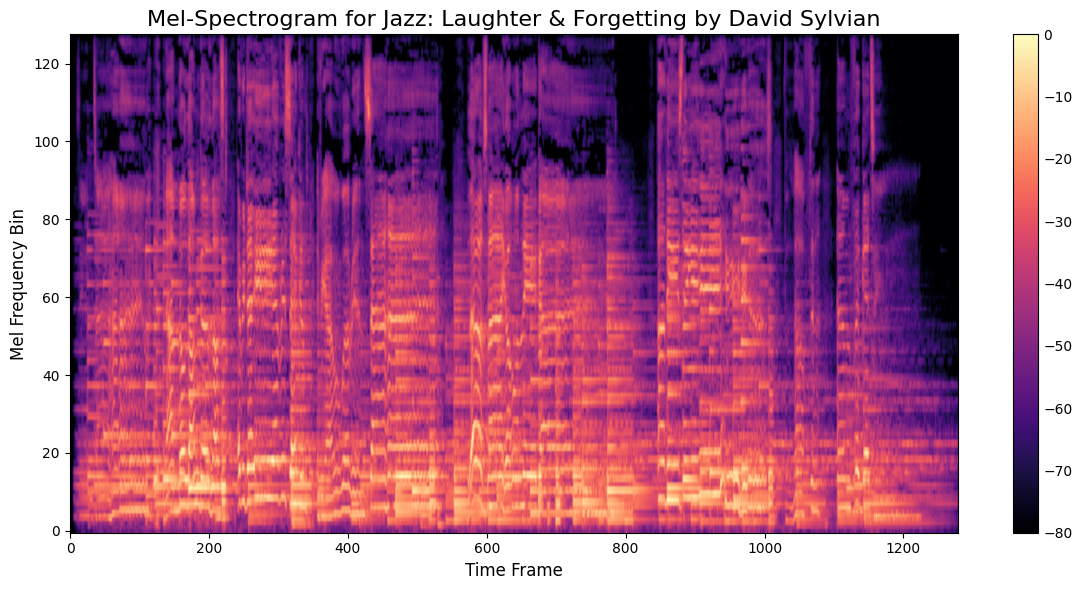

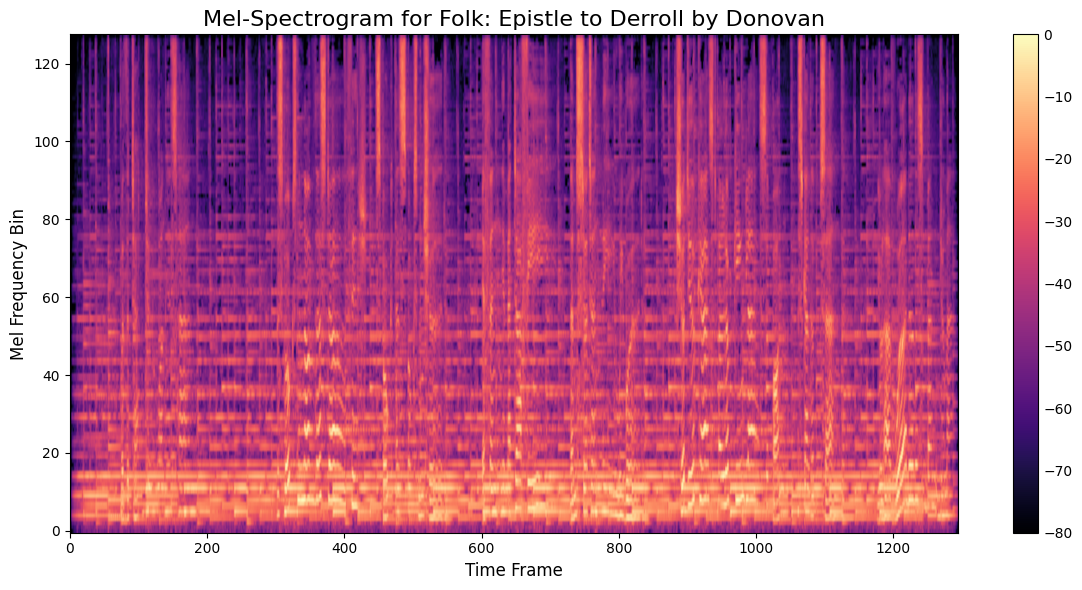

In [16]:
for genre in unique_genres:
    # Filter DataFrame for the current genre
    genre_df = df[df['Genres'] == genre]

    # Check if there are any songs in this genre before sampling
    if not genre_df.empty:
        # Randomly select one song from the filtered DataFrame
        random_song = genre_df.sample(1).iloc[0]

        # Extract spectrogram features, artist, and title
        spectrogram = np.array(random_song['spectrogram_features'])
        artist = random_song['Artist']
        title = random_song['Title']

        # Create a figure for the plot
        plt.figure(figsize=(12, 6))

        # Display the Mel-Spectrogram
        # Ensure to set aspect='auto' and origin='lower' for correct display
        # 'magma' colormap is a good choice for spectrograms
        plt.imshow(spectrogram, aspect='auto', origin='lower', cmap='magma')

        # Add title and labels
        plt.title(f'Mel-Spectrogram for {genre}: {title} by {artist}', fontsize=16)
        plt.xlabel('Time Frame', fontsize=12)
        plt.ylabel('Mel Frequency Bin', fontsize=12)

        # Hide colorbar ticks for a cleaner plot (spectrograms usually don't need a colorbar legend)
        plt.colorbar().ax.tick_params(size=0)

        # Display the plot
        plt.tight_layout()
        plt.show()
    else:
        print(f"No songs found for genre: {genre}")
